# developer: Mohammad mehdi Sahraei

### importing libraries

In [35]:
import numpy as np
from tensorflow import keras
from keras.constraints import maxnorm
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
from keras.utils import np_utils
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sns; sns.set()

### for preparing

In [2]:
#x is image , y = is label
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
# Normalize the inputs from 0-255 to between 0 and 1 by dividing by 255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0


# One-hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_class = y_test.shape[1] #10


In [48]:
#One-hot encode
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

### for creating layers

In [4]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', input_shape=X_train.shape[1:], activation='relu'))
model.add(Dropout(0.2)) # Dropout is used for turning off Neurons To prevent other neurons from becoming lazy
model.add(BatchNormalization()) # BatchNormalization does normal result for each layer
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPool2D(2))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(num_class, activation = 'softmax')) #softmax shows that which is the best result between outputs 0-1 


model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy']) # categorical_crossentropy: for revising loss

model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

### training model

In [5]:
# batch_size: for example = 50000/64 = 782
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=64)

Epoch 1/30
782/782 [==============================] - 21s 13ms/step - loss: 1.4886 - accuracy: 0.4688 - val_loss: 1.3339 - val_accuracy: 0.5407
Epoch 2/30
782/782 [==============================] - 8s 11ms/step - loss: 1.0486 - accuracy: 0.6318 - val_loss: 0.8487 - val_accuracy: 0.6974
Epoch 3/30
782/782 [==============================] - 8s 11ms/step - loss: 0.8969 - accuracy: 0.6893 - val_loss: 0.9277 - val_accuracy: 0.6835
Epoch 4/30
782/782 [==============================] - 8s 11ms/step - loss: 0.8094 - accuracy: 0.7189 - val_loss: 0.7740 - val_accuracy: 0.7306
Epoch 5/30
782/782 [==============================] - 8s 10ms/step - loss: 0.7500 - accuracy: 0.7392 - val_loss: 0.6846 - val_accuracy: 0.7620
Epoch 6/30
782/782 [==============================] - 8s 11ms/step - loss: 0.6995 - accuracy: 0.7561 - val_loss: 0.6701 - val_accuracy: 0.7625
Epoch 7/30
782/782 [==============================] - 8s 10ms/step - loss: 0.6594 - accuracy: 0.7699 - val_loss: 0.6660 - val_accuracy: 0.772

### Learning graph

loss
accuracy
val_loss
val_accuracy


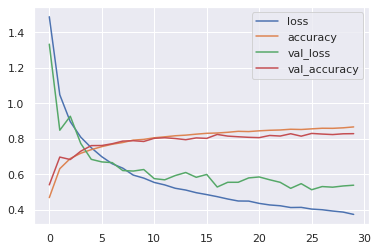

In [6]:
for key,val in history.history.items():
  print(key)

pd.DataFrame(history.history).plot()

### test

In [16]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

model.save('fisrtmodel.h5')
loader = load_model('fisrtmodel.h5')

loader.predict(X_test[0:10])[0]

1/1 [==============================] - 0s 114ms/step


array([2.35271014e-04, 1.39737647e-04, 1.41549041e-03, 9.18602586e-01,
       4.30407526e-04, 6.94392845e-02, 9.37398616e-03, 2.42810158e-04,
       1.08963635e-04, 1.13300302e-05], dtype=float32)

In [17]:
y_test[0]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [18]:
labels[3]

'cat'

### convert .h5 or image classification model to .tflite

In [46]:
# first way:

model = tf.keras.models.load_model('/content/fisrtmodel.h5')
tflite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tflite_converter.convert()
open("tf_lite_model.tflite", "wb").write(tflite_model) 

# second way:

# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# tflite_model = converter.convert()

# with open("model.tflite", 'wb') as f:
#   f.write(tflite_model)